# Evaluation Project

# Loan Application Status Prediction

# Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit 
history, loan amount, their income, dependents etc. 

# Independent/feature Variables:

1.Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.Married - This refers to applicant being in a state of matrimony

4.Dependents - This refres to persons who depends on the applicants for survival

5.Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7.Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.


# You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) 
or not on the basis of the details provided in the dataset. 

In [16]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [17]:
#importing the dataset
df=pd.read_csv('Loan Approval.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [18]:
#checking top 5 rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
#checking for bottom five rows
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [20]:
#checking shape of the dataset
df.shape

(614, 13)

In [21]:
#checking more info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [22]:
#Checking for the datatype
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [23]:
#Checking for column names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [24]:
#Checking for null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
#Checking statistical summary 
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [26]:
#Removing unwanted columns
df.drop('Gender',axis=1,inplace=True)

# Encoding Categorical Columns

In [27]:
#Encoding categorical columns using ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,0.0,0.0,5849,0.0,NaN,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,2.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,3.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,4.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,610.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,612.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


In [31]:
# Dataset contains null values need to fill with mean value of column using SimpleImputer
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = 'mean')
impu =imp.fit_transform(df)
df = pd.DataFrame(impu,columns = df.columns)

In [32]:
#Again checking for null values
df.isnull().sum()

Loan_ID              0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:

#Checking the values in the married columns
df.Married.value_counts()

1.000000    398
0.000000    213
0.651391      3
Name: Married, dtype: int64

In [34]:
# Checking the values in the Dependents column
df.Dependents.value_counts()

0.000000    345
1.000000    102
2.000000    101
3.000000     51
0.762938     15
Name: Dependents, dtype: int64

In [35]:
# Checking the values in the Education column
df.Education.value_counts()

0.0    480
1.0    134
Name: Education, dtype: int64

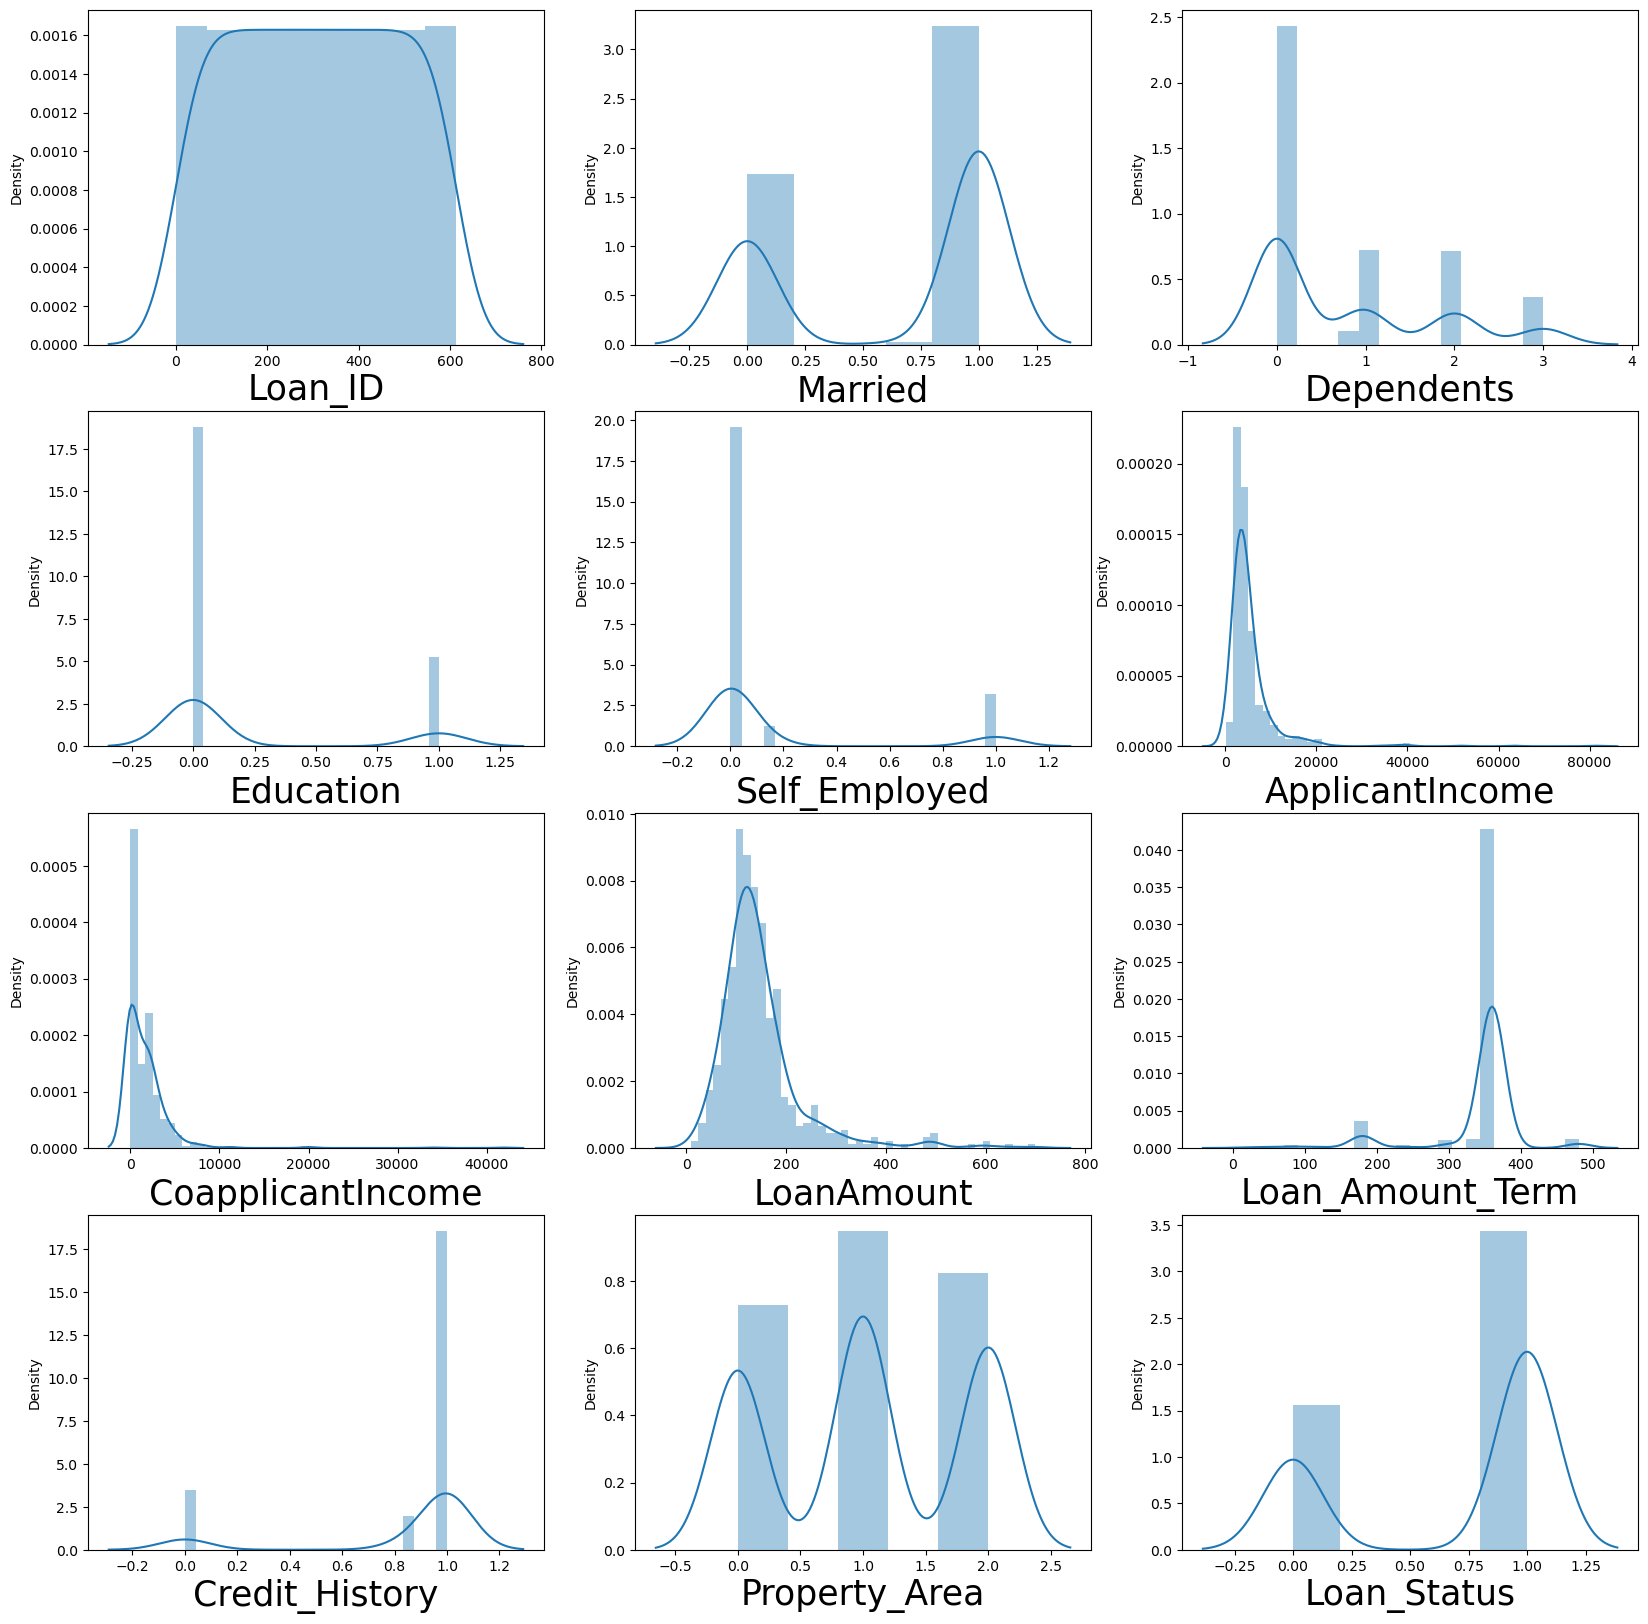

In [36]:
## distribution plot to check the data distribition
plt.figure(figsize = (20,20))
plt_num =1

for column in df:
    if plt_num<=12:
        sx = plt.subplot(4,3,plt_num)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 25)
    plt_num+=1
plt.show()

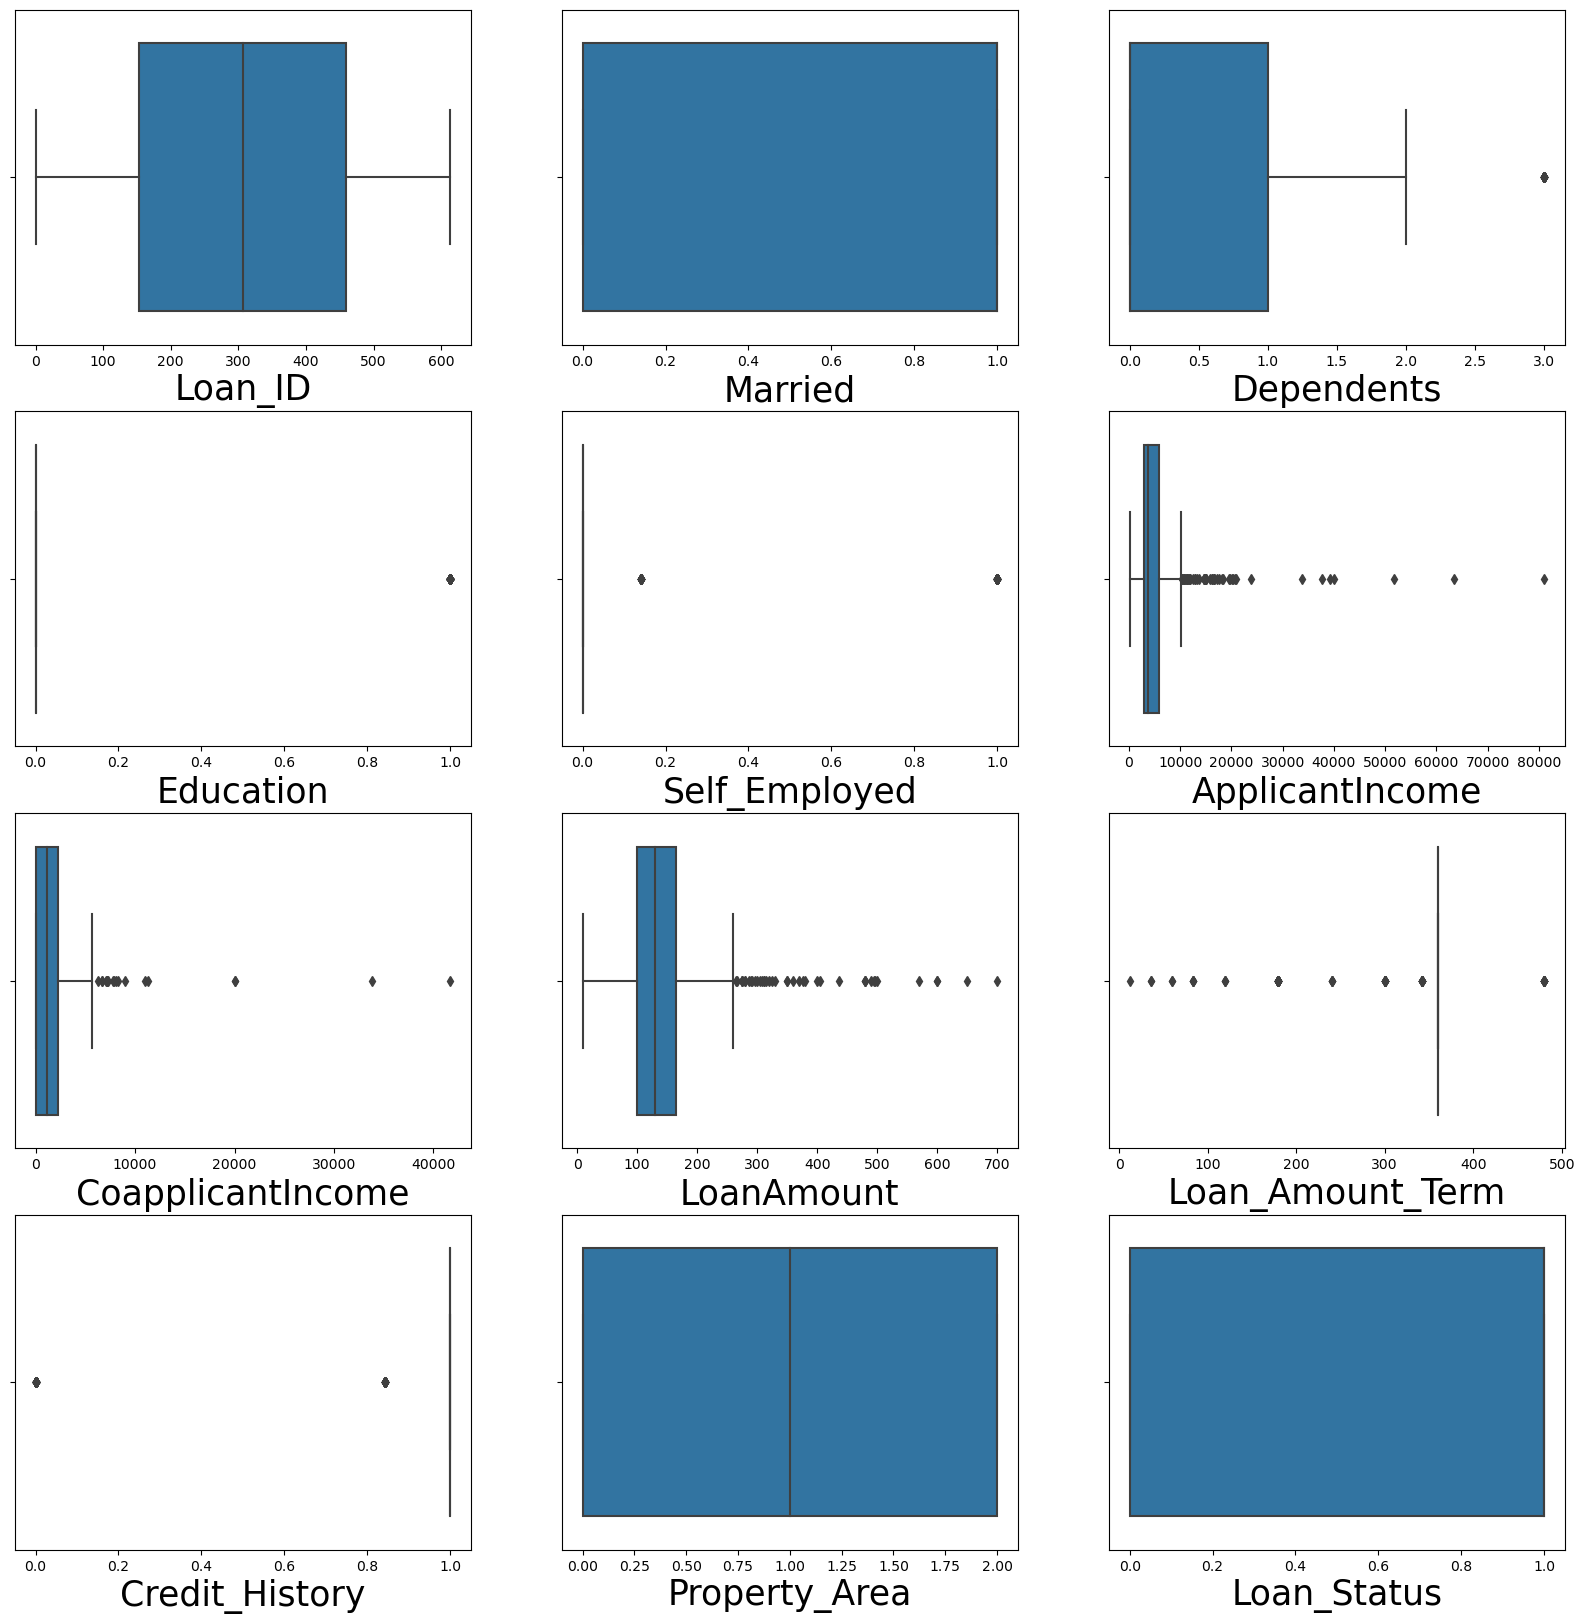

In [37]:
## plotting box for checking data skweness
plt.figure(figsize = (20,20))
plt_num =1

for column in df:
    if plt_num<=12:
        sx = plt.subplot(4,3,plt_num)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 25)
    plt_num+=1
plt.show()

In [38]:
# Checking the outliers and data skewness
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

In [39]:
iqr

Loan_ID               306.50
Married                 1.00
Dependents              1.00
Education               0.00
Self_Employed           0.00
ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             64.50
Loan_Amount_Term        0.00
Credit_History          0.00
Property_Area           2.00
Loan_Status             1.00
dtype: float64

In [40]:
# Removing outliers in the Education columns
edu = (q3.Education + (1.5 * iqr.Education))
edu

index = np.where(df['Education']>edu)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2,2.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,1.0
3,4,4.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
4,5,5.0,1.0,2.0,0.0,1.0,5417.0,4196.0,267.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,609,609.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
476,610,610.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
477,611,611.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0
478,612,612.0,1.0,2.0,0.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2.0,1.0


In [41]:
# Removing outliers in the Self_Employed columns
se = (q3.Self_Employed + (1.5 * iqr.Self_Employed))
se

index = np.where(df['Self_Employed']>se)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,4,4.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
3,7,7.0,1.0,3.0,0.0,0.0,3036.0,2504.0,158.000000,360.0,0.0,1.0,0.0
4,8,8.0,1.0,2.0,0.0,0.0,4006.0,1526.0,168.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,608,608.0,1.0,0.0,0.0,0.0,3232.0,1950.0,108.000000,360.0,1.0,0.0,1.0
385,609,609.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
386,610,610.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
387,611,611.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0


In [42]:
# Removing outliers in the ApplicantIncome columns
ai = (q3.ApplicantIncome + (1.5 * iqr.ApplicantIncome))
ai

index = np.where(df['ApplicantIncome']>ai)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,4,4.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
3,7,7.0,1.0,3.0,0.0,0.0,3036.0,2504.0,158.000000,360.0,0.0,1.0,0.0
4,8,8.0,1.0,2.0,0.0,0.0,4006.0,1526.0,168.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,608,608.0,1.0,0.0,0.0,0.0,3232.0,1950.0,108.000000,360.0,1.0,0.0,1.0
352,609,609.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
353,610,610.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
354,611,611.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0


In [43]:
# Removing outliers in the CoapplicantIncome columns
ci = (q3.CoapplicantIncome + (1.5 * iqr.CoapplicantIncome))
ci

index = np.where(df['CoapplicantIncome']>ci)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,4,4.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
3,7,7.0,1.0,3.0,0.0,0.0,3036.0,2504.0,158.000000,360.0,0.0,1.0,0.0
4,8,8.0,1.0,2.0,0.0,0.0,4006.0,1526.0,168.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,608,608.0,1.0,0.0,0.0,0.0,3232.0,1950.0,108.000000,360.0,1.0,0.0,1.0
341,609,609.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
342,610,610.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
343,611,611.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0


In [44]:
# Removing outliers in the LoanAmount columns
la = (q3.LoanAmount + (1.5 * iqr.LoanAmount))
la

index = np.where(df['LoanAmount']>la)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,4,4.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
3,7,7.0,1.0,3.0,0.0,0.0,3036.0,2504.0,158.000000,360.0,0.0,1.0,0.0
4,8,8.0,1.0,2.0,0.0,0.0,4006.0,1526.0,168.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,608,608.0,1.0,0.0,0.0,0.0,3232.0,1950.0,108.000000,360.0,1.0,0.0,1.0
331,609,609.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
332,610,610.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
333,611,611.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0


In [45]:
# Removing outliers in the LoanAmount columns
la = (q3.LoanAmount + (1.5 * iqr.LoanAmount))
la

index = np.where(df['LoanAmount']>la)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,4,4.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
3,7,7.0,1.0,3.0,0.0,0.0,3036.0,2504.0,158.000000,360.0,0.0,1.0,0.0
4,8,8.0,1.0,2.0,0.0,0.0,4006.0,1526.0,168.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,608,608.0,1.0,0.0,0.0,0.0,3232.0,1950.0,108.000000,360.0,1.0,0.0,1.0
331,609,609.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
332,610,610.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
333,611,611.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0


In [46]:
# Removing outliers in the Lower Loan_Amount_Term columns
lat = (q1.Loan_Amount_Term - (1.5 * iqr.Loan_Amount_Term))
lat

index = np.where(df['Loan_Amount_Term']>lat)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,4,4.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
3,7,7.0,1.0,3.0,0.0,0.0,3036.0,2504.0,158.000000,360.0,0.0,1.0,0.0
4,8,8.0,1.0,2.0,0.0,0.0,4006.0,1526.0,168.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,608,608.0,1.0,0.0,0.0,0.0,3232.0,1950.0,108.000000,360.0,1.0,0.0,1.0
321,609,609.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
322,610,610.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
323,611,611.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0


In [47]:
# Removing outliers in the Lower Loan_Amount_Term columns
lat = (q1.Loan_Amount_Term - (1.5 * iqr.Loan_Amount_Term))
lat

index = np.where(df['Loan_Amount_Term']>lat)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,4,4.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
3,7,7.0,1.0,3.0,0.0,0.0,3036.0,2504.0,158.000000,360.0,0.0,1.0,0.0
4,8,8.0,1.0,2.0,0.0,0.0,4006.0,1526.0,168.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,608,608.0,1.0,0.0,0.0,0.0,3232.0,1950.0,108.000000,360.0,1.0,0.0,1.0
321,609,609.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
322,610,610.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
323,611,611.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0


In [48]:
# Removing outliers in the Credit_History columns
ch = (q3.Credit_History + (1.5 * iqr.Credit_History))
ch

index = np.where(df['Credit_History']>ch)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,4,4.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
3,7,7.0,1.0,3.0,0.0,0.0,3036.0,2504.0,158.000000,360.0,0.0,1.0,0.0
4,8,8.0,1.0,2.0,0.0,0.0,4006.0,1526.0,168.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,608,608.0,1.0,0.0,0.0,0.0,3232.0,1950.0,108.000000,360.0,1.0,0.0,1.0
321,609,609.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
322,610,610.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
323,611,611.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0


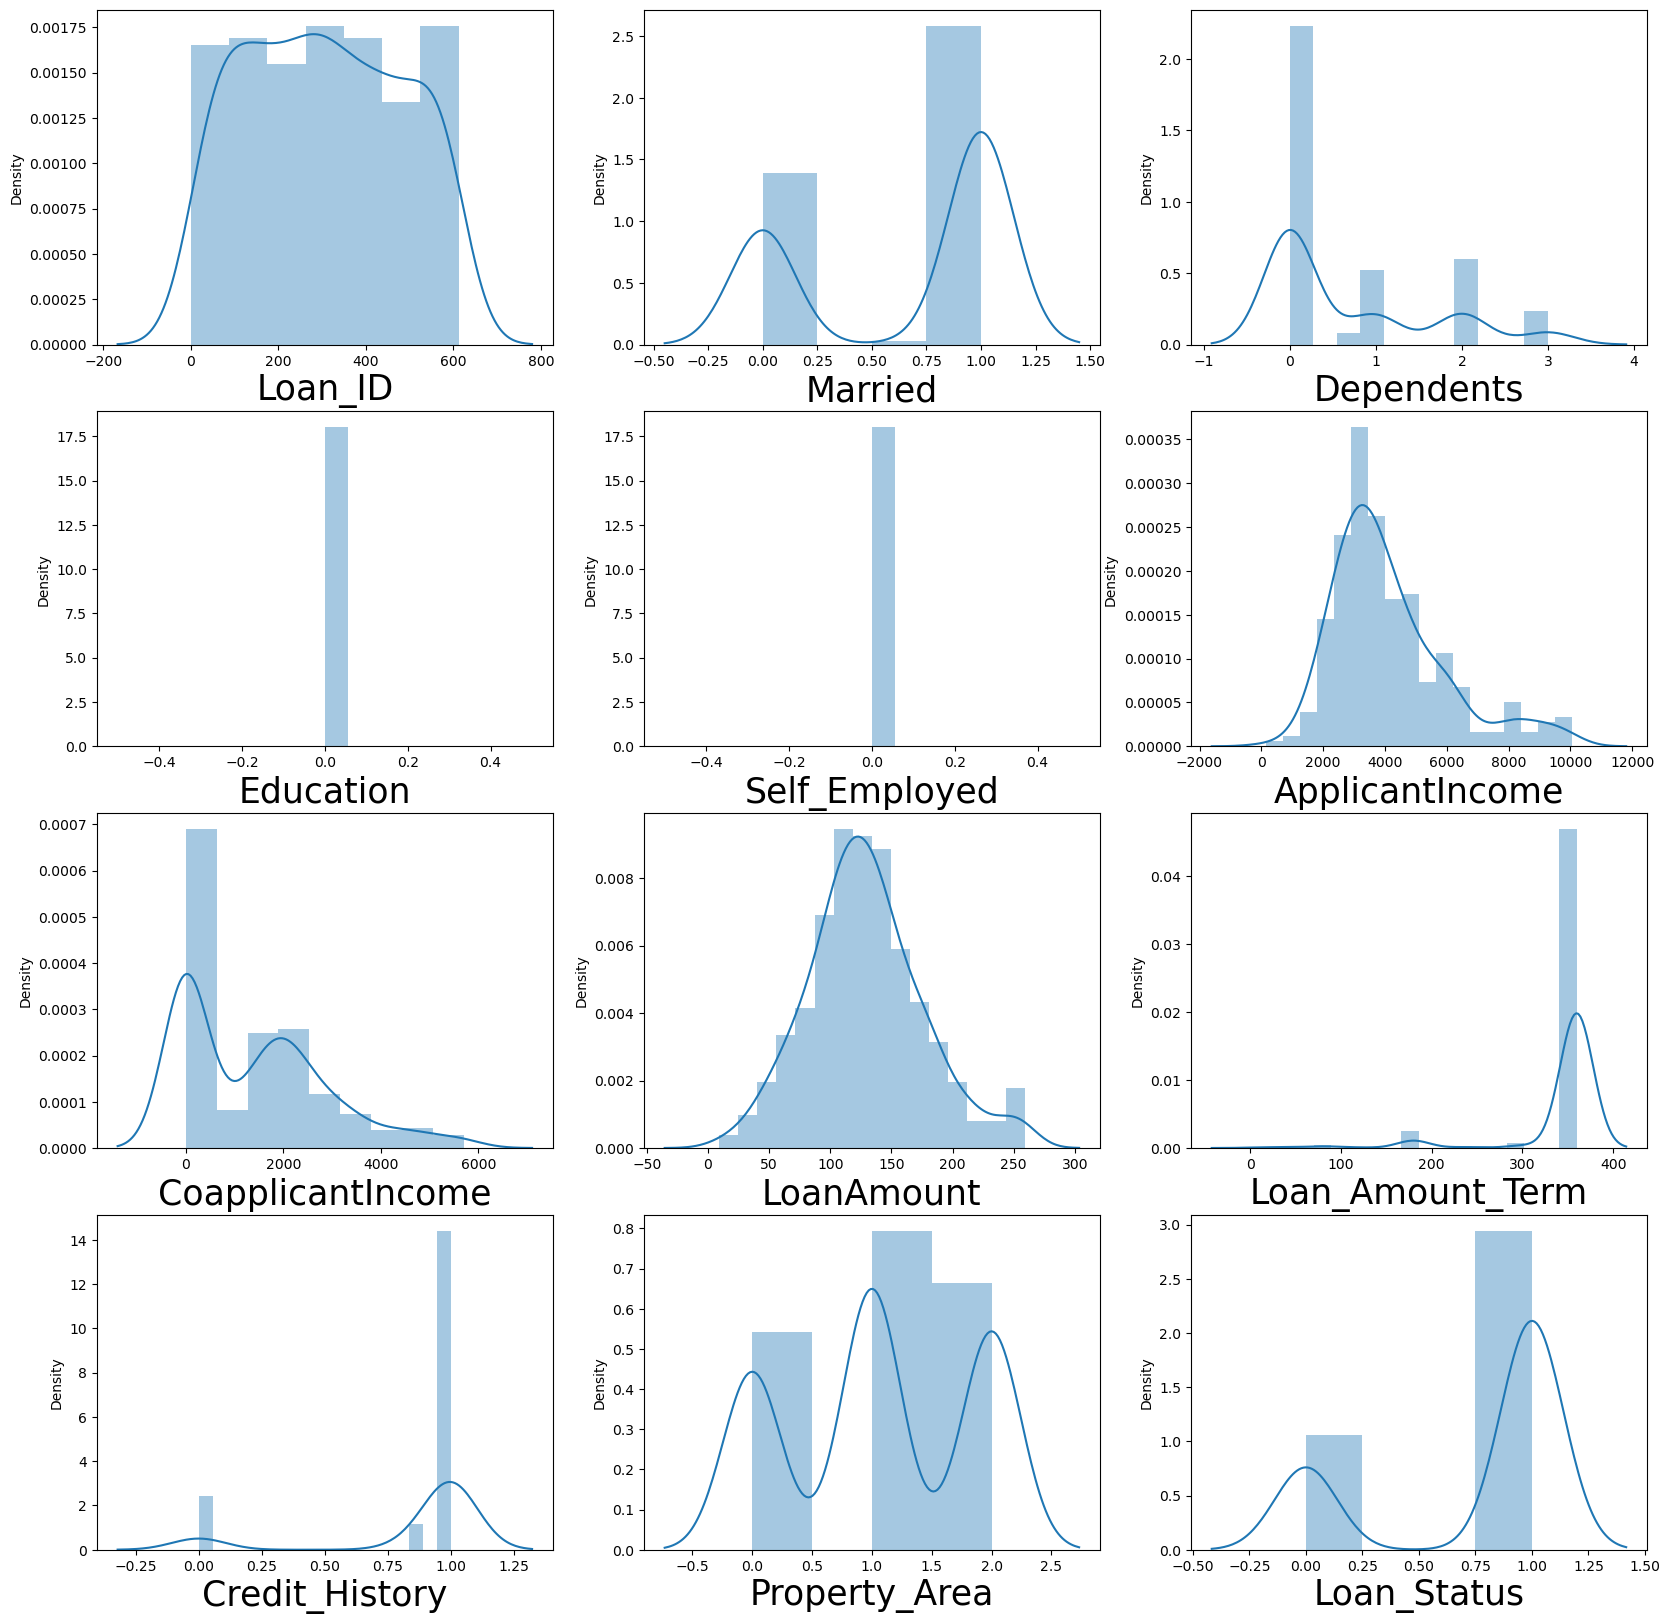

In [49]:
## distribution plot to check the data distribition
plt.figure(figsize = (20,20))
plt_num =1

for column in df:
    if plt_num<=12:
        sx = plt.subplot(4,3,plt_num)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 25)
    plt_num+=1
plt.show()

In [50]:
# Splitting the dataset into Labels and Features
x = df.drop(columns = ['Loan_Status'])
y = df['Loan_Status']

In [51]:
x

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0
4,4.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0
7,7.0,1.0,3.0,0.0,0.0,3036.0,2504.0,158.000000,360.0,0.0,1.0
8,8.0,1.0,2.0,0.0,0.0,4006.0,1526.0,168.000000,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
608,608.0,1.0,0.0,0.0,0.0,3232.0,1950.0,108.000000,360.0,1.0,0.0
609,609.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0
610,610.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0
611,611.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0


In [52]:
y

0      1.0
1      0.0
4      1.0
7      0.0
8      1.0
      ... 
608    1.0
609    1.0
610    1.0
611    1.0
612    1.0
Name: Loan_Status, Length: 325, dtype: float64

In [53]:
#Feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.711166,-1.367464,-0.703675,0.0,0.0,0.933089,-0.939508,0.367229,0.298033,0.427810,1.212266
1,-1.705529,0.735801,0.334238,0.0,0.0,0.251092,0.079836,-0.024602,0.298033,0.427810,-1.371252
2,-1.688619,-1.367464,-0.703675,0.0,0.0,1.014433,-0.939508,0.252052,0.298033,0.427810,1.212266
3,-1.671708,0.735801,2.410066,0.0,0.0,-0.582281,0.753090,0.613830,0.298033,-2.510828,-0.079493
4,-1.666071,0.735801,1.372152,0.0,0.0,-0.059740,0.092003,0.826640,0.298033,0.427810,1.212266
...,...,...,...,...,...,...,...,...,...,...,...
320,1.716057,0.735801,-0.703675,0.0,0.0,-0.476695,0.378609,-0.450222,0.298033,0.427810,-1.371252
321,1.721694,-1.367464,-0.703675,0.0,0.0,-0.655545,-0.939508,-1.237621,0.298033,0.427810,-1.371252
322,1.727331,0.735801,2.410066,0.0,0.0,-0.005869,-0.939508,-1.897334,-2.833236,0.427810,-1.371252
323,1.732968,0.735801,0.334238,0.0,0.0,2.130625,-0.777278,2.635529,0.298033,0.427810,1.212266


In [83]:
#splitting into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 55)

In [84]:
# Using KNeighborsClasssifer Algorithm for classification problem
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [85]:
#Applying the KNeighbors Classifier
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [86]:
#Predicting the values using KNeighborsClasssifier
predknn = knn.predict(x_test)
predknn

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [87]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(predknn,y_test))

0.8615384615384616


In [88]:
print(confusion_matrix(predknn,y_test))

[[ 6  2]
 [ 7 50]]


In [89]:
print(classification_report(predknn,y_test))

              precision    recall  f1-score   support

         0.0       0.46      0.75      0.57         8
         1.0       0.96      0.88      0.92        57

    accuracy                           0.86        65
   macro avg       0.71      0.81      0.74        65
weighted avg       0.90      0.86      0.87        65



In [90]:
#Cross validation score
from sklearn.model_selection import cross_val_score
cross_val_score(knn,x,y,cv = 5)

array([0.84615385, 0.78461538, 0.8       , 0.87692308, 0.84615385])

In [91]:
#cross validation for cross checking the accuracy score
cross_val_score(KNeighborsClassifier(),x,y,cv =5).mean()

0.8307692307692308

In [92]:
# hyperparameter tunning for model better Accuracy using GridSerachCV
param_grid = { 'algorithm' : ['kd_tree','brute'],'leaf_size' : [5,7,9,11,13,15,19],'n_neighbors' : [3,5,7,9,11,15,17]}

In [93]:
from sklearn.model_selection import GridSearchCV
gri_se = GridSearchCV(estimator = knn,param_grid = param_grid)
gri_se.fit(x_train,y_train)
gri_se.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 5, 'n_neighbors': 15}

In [94]:
#Using kdtree for nearest neighbor with leafsize 
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 5 , n_neighbors = 15)

In [95]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=5, n_neighbors=15)

In [96]:
#Predicting the values
pred_knn = knn.predict(x_test)
pred_knn

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [97]:
print(confusion_matrix(pred_knn,y_test))

[[ 6  2]
 [ 7 50]]


In [98]:
print(classification_report(pred_knn,y_test))

              precision    recall  f1-score   support

         0.0       0.46      0.75      0.57         8
         1.0       0.96      0.88      0.92        57

    accuracy                           0.86        65
   macro avg       0.71      0.81      0.74        65
weighted avg       0.90      0.86      0.87        65



In [99]:
# LogisticRegression 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [100]:
#Applying the LogisticRegression Algorithm
lr.fit(x_train,y_train)

LogisticRegression()

In [101]:
#Predicting the value using LogisticRegression
predlr = lr.predict(x_test)
predlr

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [104]:
print(accuracy_score(predlr,y_test))

0.8615384615384616


In [102]:
print(confusion_matrix(predlr,y_test))

[[ 6  2]
 [ 7 50]]


In [103]:
print(classification_report(predlr,y_test))

              precision    recall  f1-score   support

         0.0       0.46      0.75      0.57         8
         1.0       0.96      0.88      0.92        57

    accuracy                           0.86        65
   macro avg       0.71      0.81      0.74        65
weighted avg       0.90      0.86      0.87        65



In [105]:
#Using DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [106]:
#DecisionTree score for trainig data
dtc.score(x_train,y_train)

1.0

In [107]:
#Predicting the value wih x_test data
preddtc = dtc.predict(x_test)
preddtc

array([1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.])

In [108]:
print(accuracy_score(preddtc,y_test))
print(confusion_matrix(preddtc,y_test))
print(classification_report(preddtc,y_test))

0.7076923076923077
[[ 4 10]
 [ 9 42]]
              precision    recall  f1-score   support

         0.0       0.31      0.29      0.30        14
         1.0       0.81      0.82      0.82        51

    accuracy                           0.71        65
   macro avg       0.56      0.55      0.56        65
weighted avg       0.70      0.71      0.70        65



In [109]:
#Cross validation score 
cross_val_score(dtc,x,y,cv = 5)

array([0.38461538, 0.75384615, 0.83076923, 0.75384615, 0.24615385])

In [110]:
cross_val_score(DecisionTreeClassifier(),x,y,cv =5).mean()

0.6061538461538462

In [111]:
# hyperparameter tunning for model better Accuracy using GridSerachCV
grid_param = {'criterion':['gini','entropy'],'max_depth' : range(2,6),'min_samples_leaf':range(1,6),'min_samples_split':range(1,7)}

In [112]:
grid_search = GridSearchCV(estimator = dtc,param_grid = grid_param,cv = 5)

In [113]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 6),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(1, 7)})

In [114]:
#checking the best Parameter
best_param = grid_search.best_params_
print(best_param)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [115]:
#Applying the best parameters into DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'gini',max_depth = 2,min_samples_leaf = 3,min_samples_split = 2)

In [116]:
#Applying the best parameters into training data
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [117]:
#predicting the values with new Parameters
pred_dtc = dtc.predict(x_test)
pred_dtc

array([1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.])

In [118]:
#Accuracy score with best_feature using GridSearchCV
accuracy_score(y_test,pred_dtc)

0.7076923076923077